In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
#reading the dataset
train_indessa=pd.read_csv("train_indessa.csv")
test_indessa = pd.read_csv("test_indessa.csv")
train_indessa.head() # prints the first 5 rows of a DataFrame

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [3]:
test_indessa.head() # prints the first 5 rows of a DataFrame

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,...,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,...,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


In [4]:
#chechking if the data is imbalanaced ot not
train_indessa['loan_status'].value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

In [5]:
#Checking the Duplicates records
train_indessa.duplicated().sum()


0

In [6]:
#Checking the Duplicates records
test_indessa.duplicated().sum()

0

In [7]:
#Checking the NaN values from the dataset
train_indessa.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [8]:
train_indessa.columns


Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [9]:
#Deleting Unnnecessary Columns with high missing values
train_indessa=train_indessa.drop(['verification_status_joint','mths_since_last_major_derog','mths_since_last_record','mths_since_last_delinq','desc','batch_enrolled'],axis=1) 

test_indessa=test_indessa.drop(['verification_status_joint','mths_since_last_major_derog','mths_since_last_record','mths_since_last_delinq','desc','batch_enrolled'],axis=1) 

#Checking the NaN values from the dataset
train_indessa.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_title                     30833
emp_length                    26891
home_ownership                    0
annual_inc                        3
verification_status               0
pymnt_plan                        0
purpose                           0
title                            90
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      16
inq_last_6mths                   16
open_acc                         16
pub_rec                          16
revol_bal                         0
revol_util                      287
total_acc                        16
initial_list_status               0
total_rec_int               

In [10]:
test_indessa.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_title                     20629
emp_length                    17934
home_ownership                    0
annual_inc                        1
verification_status               0
pymnt_plan                        0
purpose                           0
title                            62
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      13
inq_last_6mths                   13
open_acc                         13
pub_rec                          13
revol_bal                         0
revol_util                      215
total_acc                        13
initial_list_status               0
total_rec_int               

In [11]:
train_indessa.dropna(how='any',inplace=True)
test_indessa.dropna(how='any',inplace=True)
train_indessa.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461710 entries, 0 to 532427
Data columns (total 39 columns):
member_id                     461710 non-null int64
loan_amnt                     461710 non-null int64
funded_amnt                   461710 non-null int64
funded_amnt_inv               461710 non-null float64
term                          461710 non-null object
int_rate                      461710 non-null float64
grade                         461710 non-null object
sub_grade                     461710 non-null object
emp_title                     461710 non-null object
emp_length                    461710 non-null object
home_ownership                461710 non-null object
annual_inc                    461710 non-null float64
verification_status           461710 non-null object
pymnt_plan                    461710 non-null object
purpose                       461710 non-null object
title                         461710 non-null object
zip_code                      461710 non-

In [12]:
test_indessa.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307464 entries, 0 to 354949
Data columns (total 38 columns):
member_id                     307464 non-null int64
loan_amnt                     307464 non-null int64
funded_amnt                   307464 non-null int64
funded_amnt_inv               307464 non-null float64
term                          307464 non-null object
int_rate                      307464 non-null float64
grade                         307464 non-null object
sub_grade                     307464 non-null object
emp_title                     307464 non-null object
emp_length                    307464 non-null object
home_ownership                307464 non-null object
annual_inc                    307464 non-null float64
verification_status           307464 non-null object
pymnt_plan                    307464 non-null object
purpose                       307464 non-null object
title                         307464 non-null object
zip_code                      307464 non-

In [13]:
train_indessa.shape


(461710, 39)

In [14]:
#Checking the NaN values from the dataset after removing missing values.
train_indessa.isnull().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collecti

In [15]:
test_indessa.isnull().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collecti

In [16]:
#Checking the values from the dataset
train_indessa['loan_status'].value_counts()

0    373724
1     87986
Name: loan_status, dtype: int64

In [17]:
#Checking the NaN values from the dataset
#train_indessa.head()

In [18]:
#Deleting Unnnecessary Columns which dont have any impact on target variable i.e loan status
train_indessa=train_indessa.drop(['member_id','funded_amnt_inv'],axis=1) 
test_indessa=test_indessa.drop(['funded_amnt_inv'],axis=1) 

In [19]:
#Checking the NaN values from the dataset
#train_indessa.head()

In [20]:
#Checking the unique values from the dataset
train_indessa['home_ownership'].value_counts()

MORTGAGE    233685
RENT        183782
OWN          44180
OTHER           32
NONE            28
ANY              3
Name: home_ownership, dtype: int64

In [21]:
train_indessa = train_indessa[train_indessa['home_ownership'] != 'OTHER']
test_indessa = test_indessa[test_indessa['home_ownership'] != 'OTHER']
train_indessa['home_ownership'].value_counts()

MORTGAGE    233685
RENT        183782
OWN          44180
NONE            28
ANY              3
Name: home_ownership, dtype: int64

In [22]:
train_indessa = train_indessa[train_indessa['home_ownership'] != 'NONE']
train_indessa = train_indessa[train_indessa['home_ownership'] != 'ANY']

test_indessa = test_indessa[test_indessa['home_ownership'] != 'NONE']
test_indessa = test_indessa[test_indessa['home_ownership'] != 'ANY']

test_indessa['home_ownership'].value_counts()

MORTGAGE    155947
RENT        122398
OWN          29097
Name: home_ownership, dtype: int64

In [23]:
#Checking the NaN values from the dataset
#train_indessa.head()

In [24]:
#Checking the NaN values from the dataset
train_indessa['sub_grade'].value_counts()

B4    28769
B3    28678
C1    27803
C2    27373
C3    26892
C4    26257
B2    25585
B5    24947
B1    23559
A5    23218
C5    22263
D1    19306
A4    16986
D2    15480
D3    13547
D4    13257
A3    11689
A1    11668
A2    11332
D5    11133
E1     9593
E2     9054
E3     7488
E4     6187
E5     5002
F1     3734
F2     2763
F3     2358
F4     1750
F5     1301
G1      930
G2      697
G3      473
G4      307
G5      268
Name: sub_grade, dtype: int64

In [25]:
#Deleting Unnnecessary Columns, as there is already grade 
train_indessa=train_indessa.drop(['sub_grade'],axis=1) 
test_indessa=test_indessa.drop(['sub_grade'],axis=1) 

In [26]:
#Checking the NaN values from the dataset
#train_indessa.head()

In [27]:
#Checking the NaN values from the dataset
train_indessa['term'].value_counts()


36 months    317257
60 months    144390
Name: term, dtype: int64

In [28]:
#Some Transformations
train_indessa['term'] = train_indessa['term'].astype(str) #Changing the cost to string
train_indessa['term'] = train_indessa['term'].apply(lambda x: x.replace('months','')) #Using lambda function to replace ',' from cost
train_indessa['term'] = train_indessa['term'].astype(float) # Changing the cost to Float

test_indessa['term'] = test_indessa['term'].astype(str) #Changing the cost to string
test_indessa['term'] = test_indessa['term'].apply(lambda x: x.replace('months','')) #Using lambda function to replace ',' from cost
test_indessa['term'] = test_indessa['term'].astype(float) # Changing the cost to Float



train_indessa.info() # looking at the dataset information after transformation


<class 'pandas.core.frame.DataFrame'>
Int64Index: 461647 entries, 0 to 532427
Data columns (total 36 columns):
loan_amnt                     461647 non-null int64
funded_amnt                   461647 non-null int64
term                          461647 non-null float64
int_rate                      461647 non-null float64
grade                         461647 non-null object
emp_title                     461647 non-null object
emp_length                    461647 non-null object
home_ownership                461647 non-null object
annual_inc                    461647 non-null float64
verification_status           461647 non-null object
pymnt_plan                    461647 non-null object
purpose                       461647 non-null object
title                         461647 non-null object
zip_code                      461647 non-null object
addr_state                    461647 non-null object
dti                           461647 non-null float64
delinq_2yrs                   461647 no

In [29]:
#Checking the NaN values from the dataset
#train_indessa.head()

In [30]:
#Some Transformations
train_indessa['emp_length'] = train_indessa['emp_length'].astype(str) #Changing the cost to string
train_indessa['emp_length'] = train_indessa['emp_length'].apply(lambda x: x.replace('years','')) #Using lambda function to replace ',' from cost
train_indessa['emp_length'] = train_indessa['emp_length'].apply(lambda x: x.replace('year',''))
train_indessa['emp_length'] = train_indessa['emp_length'].apply(lambda x: x.replace('+',''))
train_indessa['emp_length'] = train_indessa['emp_length'].apply(lambda x: x.replace('<',''))
train_indessa['emp_length'] = train_indessa['emp_length'].apply(lambda x: x.replace(' s',''))
train_indessa['emp_length'] = train_indessa['emp_length'].astype(float) # Changing the cost to Float
#train_indessa.info() # looking at the dataset information after transformation
#train_indessa['emp_length'].unique()
#train_indessa.head()

test_indessa['emp_length'] = test_indessa['emp_length'].astype(str) #Changing the cost to string
test_indessa['emp_length'] = test_indessa['emp_length'].apply(lambda x: x.replace('years','')) #Using lambda function to replace ',' from cost
test_indessa['emp_length'] = test_indessa['emp_length'].apply(lambda x: x.replace('year',''))
test_indessa['emp_length'] = test_indessa['emp_length'].apply(lambda x: x.replace('+',''))
test_indessa['emp_length'] = test_indessa['emp_length'].apply(lambda x: x.replace('<',''))
test_indessa['emp_length'] = test_indessa['emp_length'].apply(lambda x: x.replace(' s',''))
test_indessa['emp_length'] = test_indessa['emp_length'].astype(float) # Changing the cost to Float


In [31]:
#Deleting Unnnecessary Columns, as there is already grade 
train_indessa=train_indessa.drop(['emp_title'],axis=1) 

test_indessa=test_indessa.drop(['emp_title'],axis=1) 

In [32]:
#train_indessa.head()

In [33]:
#Checking the NaN values from the dataset
train_indessa['verification_status'].value_counts()

Source Verified    181076
Verified           140744
Not Verified       139827
Name: verification_status, dtype: int64

In [34]:
#Some Transformations
train_indessa['verification_status'] = train_indessa['verification_status'].astype(str) #Changing the cost to string
train_indessa['verification_status'] = train_indessa['verification_status'].apply(lambda x: x.replace('Source Verified','Verified')) #Using lambda function to replace ',' from cost

#Some Transformations
test_indessa['verification_status'] = test_indessa['verification_status'].astype(str) #Changing the cost to string
test_indessa['verification_status'] = test_indessa['verification_status'].apply(lambda x: x.replace('Source Verified','Verified')) #Using lambda function to replace

#train_indessa['term'] = train_indessa['term'].astype(float) # Changing the cost to Float
#train_indessa.info() # looking at the dataset information after transformation

In [35]:
train_indessa['verification_status'].value_counts()
print("+++++++++")
test_indessa['verification_status'].value_counts()

+++++++++


Verified        214287
Not Verified     93155
Name: verification_status, dtype: int64

In [36]:
train_indessa['pymnt_plan'].value_counts()

n    461642
y         5
Name: pymnt_plan, dtype: int64

In [37]:
#Deleting pymnt_plan as this having almost same value for records
train_indessa=train_indessa.drop(['pymnt_plan'],axis=1) 
test_indessa=test_indessa.drop(['pymnt_plan'],axis=1) 
#train_indessa['pymnt_plan'].value_counts()

In [38]:
#train_indessa.head()

In [39]:
#Checking the NaN values from the dataset
train_indessa['title'].value_counts()

Debt consolidation            234600
Credit card refinancing        92441
Home improvement               22136
Other                          17467
Debt Consolidation              6882
                               ...  
Consuldation                       1
New Roof / Engagement Ring         1
Get things in one place            1
My Car Loan                        1
Vineyard Expansion                 1
Name: title, Length: 23124, dtype: int64

In [40]:
#Deleting Unnnecessary Columns, as there is already grade 
train_indessa=train_indessa.drop(['title','purpose'],axis=1) 
test_indessa=test_indessa.drop(['title','purpose'],axis=1) 

In [41]:
#train_indessa.head()

In [42]:
#Deleting Unnnecessary Columns, as there is already grade 
train_indessa=train_indessa.drop(['zip_code'],axis=1) 

test_indessa=test_indessa.drop(['zip_code'],axis=1) 

In [43]:
#train_indessa.head()


In [44]:
#Deleting Unnnecessary Columns, as there is already grade 
train_indessa=train_indessa.drop(['addr_state'],axis=1) 

test_indessa=test_indessa.drop(['addr_state'],axis=1) 

In [45]:
#test_indessa.head()

In [46]:

#Checking the NaN values from the dataset
train_indessa['initial_list_status'].value_counts()


w    244279
f    217368
Name: initial_list_status, dtype: int64

In [47]:
#

#Checking the NaN values from the dataset
train_indessa['application_type'].value_counts()

INDIVIDUAL    461387
JOINT            260
Name: application_type, dtype: int64

In [48]:
#last_week_pay

#Checking the NaN values from the dataset
train_indessa['last_week_pay'].value_counts()

13th week     28111
9th week      26567
26th week     25429
22th week     23906
4th week      23894
35th week     22190
39th week     21961
17th week     20544
31th week     20112
52th week     17648
65th week     17476
48th week     17358
61th week     16375
78th week     12844
74th week     11977
87th week      9991
NAth week      9713
44th week      9561
91th week      9528
83th week      8752
70th week      8588
43th week      7307
57th week      6929
100th week     6842
109th week     6589
104th week     6339
96th week      5572
117th week     5425
113th week     5346
156th week     4611
56th week      4589
122th week     4362
126th week     4318
135th week     3428
131th week     2967
30th week      2942
139th week     2870
95th week      2424
148th week     2274
144th week     2039
152th week     1948
82th week      1694
18th week      1411
130th week     1257
69th week      1111
161th week     1088
0th week        776
8th week        559
143th week      429
21th week       385


In [49]:
#Some Transformations
train_indessa['last_week_pay'] = train_indessa['last_week_pay'].astype(str) #Changing the cost to string
train_indessa['last_week_pay'] = train_indessa['last_week_pay'].apply(lambda x: x.replace('th week','')) #Using lambda function to replace ',' from cost
#train_indessa['term'] = train_indessa['term'].astype(float) # Changing the cost to Float
#train_indessa.info() # looking at the dataset information after transformation

#Some Transformations
test_indessa['last_week_pay'] = test_indessa['last_week_pay'].astype(str) #Changing the cost to string
test_indessa['last_week_pay'] = test_indessa['last_week_pay'].apply(lambda x: x.replace('th week',''))

train_indessa['last_week_pay'].value_counts()

13     28111
9      26567
26     25429
22     23906
4      23894
35     22190
39     21961
17     20544
31     20112
52     17648
65     17476
48     17358
61     16375
78     12844
74     11977
87      9991
NA      9713
44      9561
91      9528
83      8752
70      8588
43      7307
57      6929
100     6842
109     6589
104     6339
96      5572
117     5425
113     5346
156     4611
56      4589
122     4362
126     4318
135     3428
131     2967
30      2942
139     2870
95      2424
148     2274
144     2039
152     1948
82      1694
18      1411
130     1257
69      1111
161     1088
0        776
8        559
143      429
21       385
165      310
121      251
170      190
174      183
92       143
108      117
169       70
178       27
Name: last_week_pay, dtype: int64

In [50]:
#train_indessa.info()
#Some Transformations
train_indessa['last_week_pay'] = train_indessa['last_week_pay'].astype(str) #Changing the cost to string
train_indessa['last_week_pay'] = train_indessa['last_week_pay'].apply(lambda x: x.replace('NA','0')) #Using lambda function to replace ',' from cost
train_indessa['last_week_pay'] = train_indessa['last_week_pay'].astype(float) # Changing the cost to Float
#train_indessa.info() # looking at the dataset information after transformation

test_indessa['last_week_pay'] = test_indessa['last_week_pay'].astype(str) #Changing the cost to string
test_indessa['last_week_pay'] = test_indessa['last_week_pay'].apply(lambda x: x.replace('NA','0')) #Using lambda function to replace ',' from cost
test_indessa['last_week_pay'] = test_indessa['last_week_pay'].astype(float) # Changing the cost to Float

train_indessa['last_week_pay'].value_counts()

13.0     28111
9.0      26567
26.0     25429
22.0     23906
4.0      23894
35.0     22190
39.0     21961
17.0     20544
31.0     20112
52.0     17648
65.0     17476
48.0     17358
61.0     16375
78.0     12844
74.0     11977
0.0      10489
87.0      9991
44.0      9561
91.0      9528
83.0      8752
70.0      8588
43.0      7307
57.0      6929
100.0     6842
109.0     6589
104.0     6339
96.0      5572
117.0     5425
113.0     5346
156.0     4611
56.0      4589
122.0     4362
126.0     4318
135.0     3428
131.0     2967
30.0      2942
139.0     2870
95.0      2424
148.0     2274
144.0     2039
152.0     1948
82.0      1694
18.0      1411
130.0     1257
69.0      1111
161.0     1088
8.0        559
143.0      429
21.0       385
165.0      310
121.0      251
170.0      190
174.0      183
92.0       143
108.0      117
169.0       70
178.0       27
Name: last_week_pay, dtype: int64

In [51]:
#print(train_indessa['last_week_pay'].mean())

In [52]:
#test_indessa.head()

In [53]:
#tot_cur_bal
train_indessa['tot_cur_bal'].value_counts()

0.0         60
14511.0     15
5537.0      14
23254.0     14
20591.0     13
            ..
361194.0     1
361193.0     1
456789.0     1
228397.0     1
145436.0     1
Name: tot_cur_bal, Length: 245017, dtype: int64

In [54]:
#for c in ['home_ownership', 'verification_status', 'application_type']:
train_indessa=pd.get_dummies(train_indessa)
#train_indessa.head()
#train_indessa.info()

test_indessa=pd.get_dummies(test_indessa)

In [55]:
train_indessa.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'last_week_pay', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status',
       'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Verified', 'initial_list_status_f',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT'],
      dtype='object')

In [56]:
#train_indessa.head()

In [57]:
train_indessa['loan_status'].value_counts() 

0    373709
1     87938
Name: loan_status, dtype: int64

# data is bit unbalanced here we can look for Randomforestclassifier because ubalanced data don't affect much decision tree based models

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'last_week_pay', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status',
       'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Verified', 'initial_list_status_f',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT'],
      dtype='object')

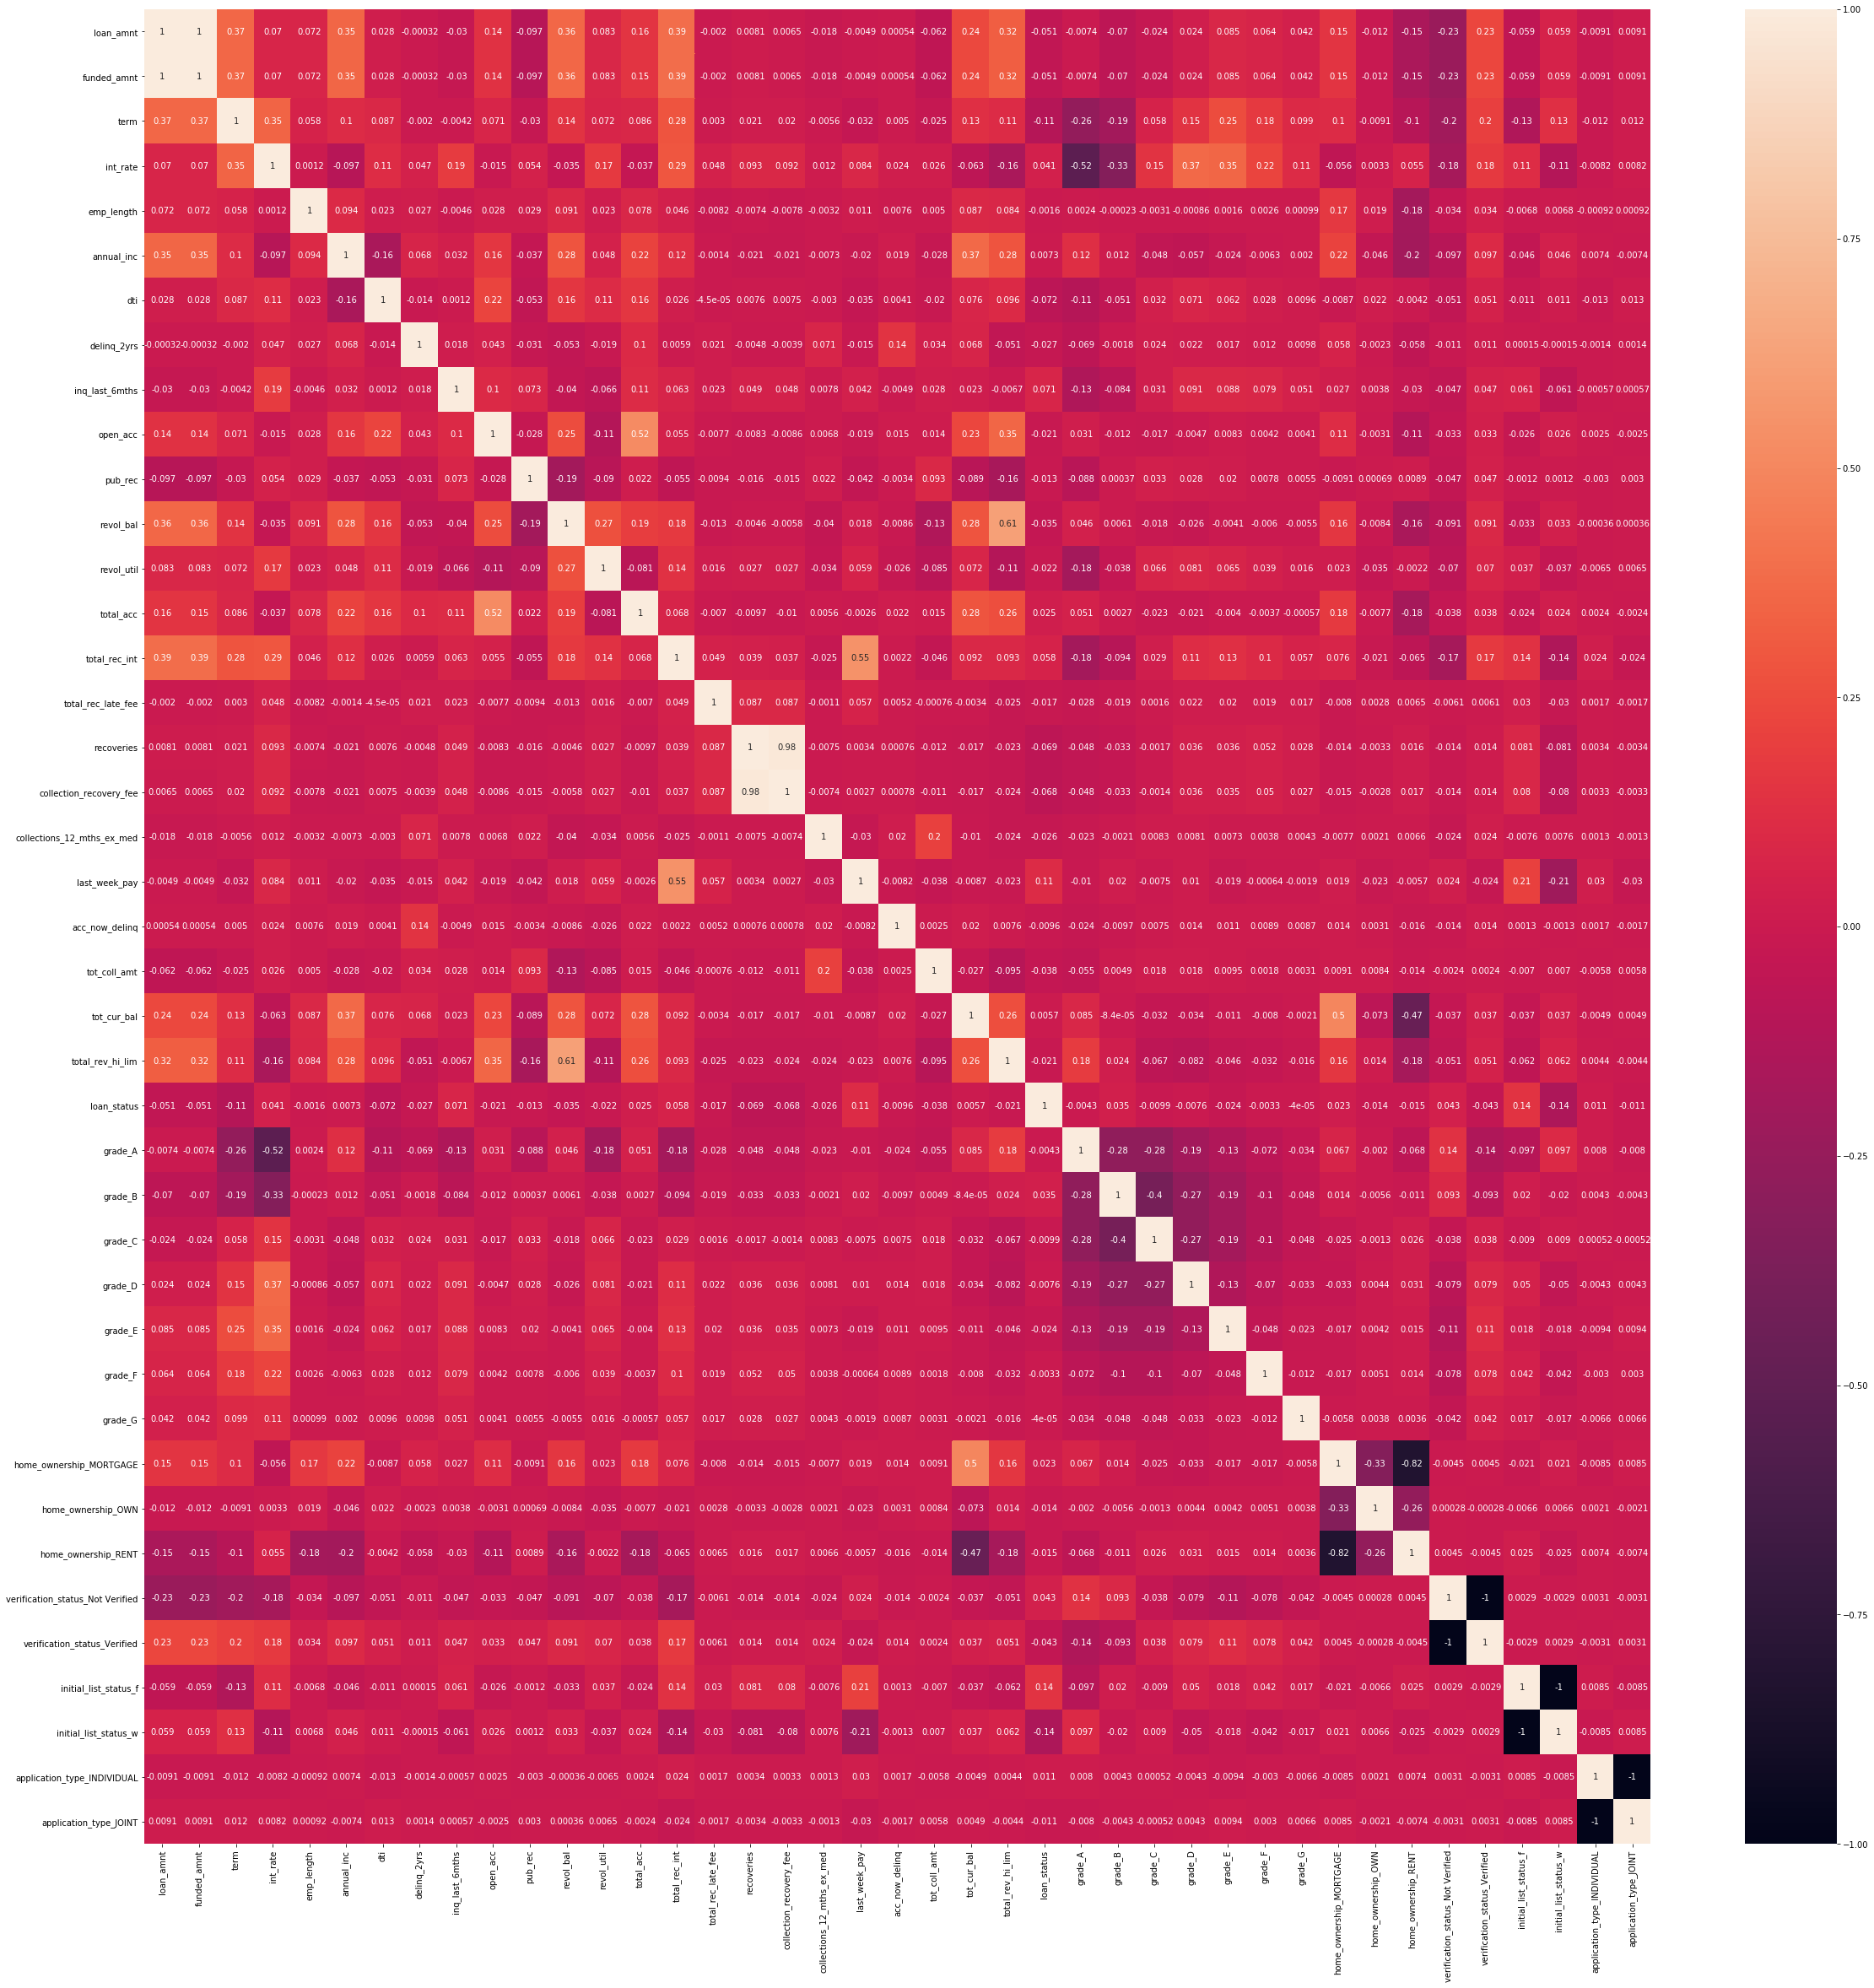

In [58]:
#Get Correlation between different variables
corr = train_indessa.corr(method='kendall')
plt.figure(figsize=(40,40))
sns.heatmap(corr, annot=True)
train_indessa.columns

Loan amount and funded amount are highly Correlated, but we can drop one of them.....

In [59]:
#Deleting high  Correlated Columns, 
train_indessa=train_indessa.drop(['funded_amnt'],axis=1) 
test_indessa=test_indessa.drop(['funded_amnt'],axis=1)

In [60]:
#train_indessa.head()

In [61]:
# We need to do the feature scalling now for numerical features
train_indessa.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'loan_status', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_MORTGAGE',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified', 'verification_status_Verified',
       'initial_list_status_f', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT'],
      dtype='object')

In [62]:
#Defining the independent variables and dependent variablesco
x = train_indessa.drop(['loan_status'],axis=1)
y = train_indessa['loan_status']


x.shape

(461647, 39)

In [63]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(x)
x.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,grade_G,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,14350,36.0,19.19,9.0,28700.0,33.88,0.0,1.0,14.0,1.0,...,0,0,1,0,0,1,1,0,1,0
1,4800,36.0,10.99,1.0,65000.0,3.64,0.0,1.0,6.0,0.0,...,0,1,0,0,0,1,0,1,1,0
2,10000,36.0,7.26,2.0,45000.0,18.42,0.0,0.0,5.0,0.0,...,0,0,1,0,1,0,0,1,1,0
3,15000,36.0,19.72,10.0,105000.0,14.97,0.0,2.0,10.0,0.0,...,0,0,0,1,1,0,1,0,1,0
4,16000,36.0,10.64,10.0,52000.0,20.16,0.0,0.0,11.0,0.0,...,0,0,0,1,0,1,0,1,1,0


In [64]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

num_cols= ['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim']


# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scaletrain = StandardScaler().fit(train_indessa[[i]])
    scaleTest = StandardScaler().fit(train_indessa[[i]])
    
    # transform the training data column
    test_indessa[i] = scaleTest.transform(test_indessa[[i]])
    test_indessa[i] = scaleTest.transform(test_indessa[[i]])
    

        
  

In [65]:
train_indessa.head()
test_indessa.shape

(307442, 40)

In [66]:
#To avoid dummy variable trap, deleting one of the categorical variable generated by dummy varibale creation
train_indessa=train_indessa.drop(['grade_A','home_ownership_MORTGAGE','verification_status_Verified','initial_list_status_w','application_type_JOINT'],axis=1) 

test_indessa=test_indessa.drop(['grade_A','home_ownership_MORTGAGE','verification_status_Verified','initial_list_status_w','application_type_JOINT'],axis=1) 





In [67]:
#test_indessa.head()

In [68]:
# to identify the highlly correaled features.
def correlation(data, limit):
    col_corr= set()
    corr_matrix=train_indessa.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > limit:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

Hello stop here....

In [69]:
corr_feature =correlation(train_indessa, 0.4)
corr_feature

{'collection_recovery_fee',
 'grade_E',
 'home_ownership_RENT',
 'int_rate',
 'last_week_pay',
 'term',
 'tot_cur_bal',
 'total_acc',
 'total_rec_int',
 'total_rev_hi_lim'}

In [70]:
#Deleting high  Correlated Columns, 
train_indessa=train_indessa.drop(corr_feature,axis=1) 

test_indessa=test_indessa.drop(corr_feature,axis=1)

In [71]:
#Defining the independent variables and dependent variablesco
x = train_indessa.drop(['loan_status'],axis=1)
y = train_indessa['loan_status']
#Getting Test and Training Set
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
#x_train.head()

x.head()

,loan_amnt,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,tot_coll_amt,grade_B,grade_C,grade_D,grade_F,grade_G,home_ownership_OWN,verification_status_Not Verified,initial_list_status_f,application_type_INDIVIDUAL
0,14350,9.0,28700.0,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,...,0.0,0,0,0,0,0,1,0,1,1
1,4800,1.0,65000.0,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,...,0.0,1,0,0,0,0,0,0,0,1
2,10000,2.0,45000.0,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,...,65.0,0,0,0,0,0,1,1,0,1
3,15000,10.0,105000.0,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,...,0.0,0,0,1,0,0,0,1,1,1
4,16000,10.0,52000.0,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,...,0.0,1,0,0,0,0,0,0,0,1


In [72]:
test_indessa.head()

,member_id,loan_amnt,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,tot_coll_amt,grade_B,grade_C,grade_D,grade_F,grade_G,home_ownership_OWN,verification_status_Not Verified,initial_list_status_f,application_type_INDIVIDUAL
0,11937648,-1.793662,-1.912202,-1.144208,-2.068927,0.47834,-0.341185,-2.051078,-0.897115,-0.763624,...,-0.108176,0,1,0,0,0,0,0,1,1
1,38983318,-1.793634,-1.832344,-1.144201,-2.032069,-0.79787,-1.427740,-2.329293,-0.897115,-0.763675,...,-0.108176,1,0,0,0,0,0,0,0,1
2,27999917,-1.793703,-1.433059,-1.144210,-2.169344,0.47834,-1.427740,-2.224962,1.905430,-0.763659,...,-0.108176,0,0,1,0,0,0,1,0,1
3,61514932,-1.793368,-1.433059,-1.144191,-2.234063,-0.79787,-1.427740,-1.877195,-0.897115,-0.763619,...,-0.108176,0,1,0,0,0,1,0,1,1
4,59622821,-1.793767,-1.832344,-1.144212,-2.191691,-0.79787,-1.427740,-2.051078,-0.897115,-0.763673,...,-0.108176,0,0,0,0,0,0,1,0,1


In [73]:
#x.columns

In [74]:
#y.head()

In [75]:
#from sklearn.feature_selection import VarianceThreshold
#selector = VarianceThreshold()
#selector.fit_transform(x)
#x.head()

In [76]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#X_new = SelectKBest(chi2, k=10).fit_transform(x, y)

In [77]:
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5,random_state=353)
x_train.head()

,loan_amnt,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,tot_coll_amt,grade_B,grade_C,grade_D,grade_F,grade_G,home_ownership_OWN,verification_status_Not Verified,initial_list_status_f,application_type_INDIVIDUAL
206569,12000,8.0,68000.0,6.57,0.0,0.0,11.0,0.0,8147.0,61.7,...,0.0,1,0,0,0,0,0,0,0,1
8606,14900,2.0,52000.0,28.32,2.0,0.0,6.0,0.0,1244.0,40.1,...,0.0,0,0,1,0,0,0,0,1,1
334801,7800,4.0,66664.0,12.66,0.0,1.0,11.0,0.0,45.0,0.2,...,0.0,1,0,0,0,0,0,1,1,1
360709,6000,6.0,53000.0,31.57,0.0,0.0,11.0,2.0,2212.0,7.5,...,186.0,0,0,0,0,0,0,0,0,1
378993,30000,5.0,150000.0,8.94,0.0,3.0,10.0,0.0,39409.0,61.1,...,0.0,0,0,0,0,0,0,0,1,1


In [78]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
#classifier=RandomForestClassifier(n_estimators=100, max_depth=80,min_samples_split=10, max_features=3,min_samples_leaf=4,random_state=0)
classifier.fit(x_train,y_train)

#from sklearn.model_selection import GridSearchCV

#param_grid = {
    #'max_depth': [80, 90, 100, 110],
  #  'max_features': [2, 3],
   # 'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    #'n_estimators': [100, 200, 300, 1000]
#}

# Instantiate the grid search model
#grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                      #    cv = 10, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
#grid_search.fit(x_train, y_train)

#grid_search.best_params_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
y_pred = classifier.predict(x_test)

#best_grid = grid_search.best_estimator_
#grid_accuracy = evaluate(best_grid, x_test, y_test)

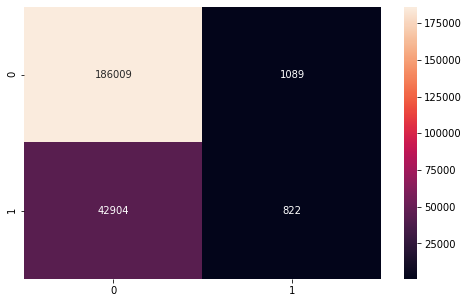

In [80]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm)
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d');


Here Type-I error is very high, our main focus should to minimise the FN from onfusin matrix. to improve this I need soneone from domain side so that we can remove some of other attribute which is not much important. As this is time consuming hence I'm not spending much time over here....   

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89    187098
           1       0.43      0.02      0.04     43726

    accuracy                           0.81    230824
   macro avg       0.62      0.51      0.47    230824
weighted avg       0.74      0.81      0.73    230824



In [126]:
#Defining the independent variables and dependent variablesco
test_indessa_test = test_indessa.drop(['member_id'],axis=1)
test_indessa_member_id = test_indessa['member_id']

In [134]:
test_indessa_pred = classifier.predict(test_indessa_test)

In [135]:
loan_status = pd.DataFrame(y_pred)

In [138]:
results = pd.concat([test_indessa['member_id'],loan_status],axis=1)

In [139]:
type(results)

pandas.core.frame.DataFrame

In [140]:
results.columns=['member_id','loan_status']

In [141]:
results.head()

,member_id,loan_status
0,11937648.0,0.0
1,38983318.0,0.0
2,27999917.0,0.0
3,61514932.0,0.0
4,59622821.0,0.0


In [143]:
#results.set_index('member_id')

In [144]:
results.head()

,member_id,loan_status
0,11937648.0,0.0
1,38983318.0,0.0
2,27999917.0,0.0
3,61514932.0,0.0
4,59622821.0,0.0


In [145]:
results.to_csv('./loan_status.csv',index=False)

In [146]:
results['loan_status'].value_counts() 

0.0    228913
1.0      1911
Name: loan_status, dtype: int64

In [86]:
# By tuning the Hyperparameter we can get the best Hyperparameter for random forest classifier and this can also improve the performance of the model

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [80],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4 ],
    'min_samples_split': [8, 10],
    'n_estimators': [100]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

Due to low laptop configuration I have used very less conbination over here this can be improved on high congiuration machine to minimise the computational time.

In [88]:
# Fit the grid search to the data
#grid_search.fit(x_train, y_train)



In [89]:
#grid_search.best_params_

In [90]:
from sklearn.model_selection import cross_val_score
grdSearchCvclassifier = RandomForestClassifier(n_estimators=100, max_depth=80,min_samples_split=10, max_features=3,min_samples_leaf=4,random_state=0)
#classifier.fit(x_train,y_train)

scores = cross_val_score(grdSearchCvclassifier, x_train, y_train, cv=5)
scores.mean()


0.8085069513235194

This can be imporoved by appliying other hyper parameter tuning concepts, 